# 1. Preparing the Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv("/Users/admin/Desktop/tutorial/Complete-Tensorflow2-and-Keras-Deep-Learning-Bootcamp/TF_2_Notebooks_and_Data/DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


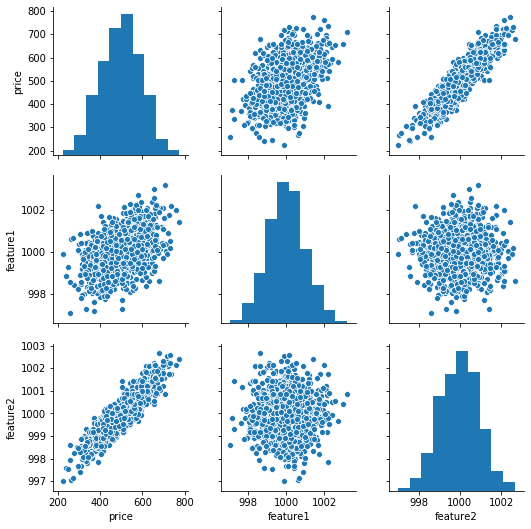

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[["feature1", "feature2"]].values

In [7]:
y = df['price'].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.min()

0.0

In [19]:
X_train.max()

1.0

# 2. Creating and Training the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [22]:
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [23]:
model.fit(x=X_train, y=y_train, epochs=250, verbose=1)

Epoch 1/250
22/22 [==============================] - 0s 714us/step - loss: 250613.7853
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256978.1230
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 257163.1495
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 253854.7636
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 253779.6338
Epoch 6/250
22/22 [==============================] - 0s 842us/step - loss: 254265.2024
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 253550.2493
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 253347.1087
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256476.2310
Epoch 10/250
22/22 [==============================] - 0s 976us/step - loss: 249377.9171
Epoch 11/250
22/22 [==============================] - 0s 947us/step - loss: 249811.5360
Epoch 12/250
22/22 [==============================] - 0

22/22 [==============================] - 0s 1ms/step - loss: 748.3345
Epoch 97/250
22/22 [==============================] - 0s 991us/step - loss: 706.3250
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 618.2905
Epoch 99/250
22/22 [==============================] - 0s 781us/step - loss: 601.5634
Epoch 100/250
22/22 [==============================] - 0s 841us/step - loss: 590.7189
Epoch 101/250
22/22 [==============================] - 0s 826us/step - loss: 543.8405
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 544.9757
Epoch 103/250
22/22 [==============================] - 0s 838us/step - loss: 506.5818
Epoch 104/250
22/22 [==============================] - 0s 995us/step - loss: 525.2482
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 486.6379
Epoch 106/250
22/22 [==============================] - 0s 992us/step - loss: 423.1902
Epoch 107/250
22/22 [==============================] - 0s 893us/step - loss: 43

22/22 [==============================] - 0s 1ms/step - loss: 25.3456
Epoch 193/250
22/22 [==============================] - 0s 959us/step - loss: 23.3405
Epoch 194/250
22/22 [==============================] - 0s 896us/step - loss: 24.5419
Epoch 195/250
22/22 [==============================] - 0s 841us/step - loss: 24.1854
Epoch 196/250
22/22 [==============================] - 0s 903us/step - loss: 27.3252
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 24.5077
Epoch 198/250
22/22 [==============================] - 0s 931us/step - loss: 23.6146
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2272
Epoch 200/250
22/22 [==============================] - 0s 824us/step - loss: 22.5654
Epoch 201/250
22/22 [==============================] - 0s 908us/step - loss: 24.6352
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.8139
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 25.1135
Epoc

In [24]:
loss_df = pd.DataFrame(model.history.history)

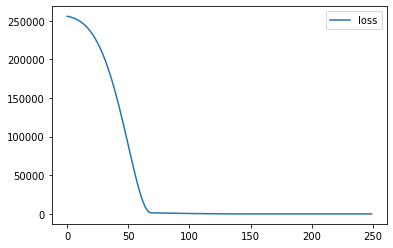

In [25]:
loss_df.plot()

# Model Evaluation

In [26]:
model.evaluate(X_test, y_test, verbose=0) #loss of the test data

25.212814331054688

In [27]:
model.evaluate(X_train, y_train, verbose=0) #loss of the train data

24.65184783935547

In [28]:
test_predictions = model.predict(X_test)

In [29]:
test_predictions

array([[404.72037],
       [622.82025],
       [591.4303 ],
       [571.5507 ],
       [366.09024],
       [578.493  ],
       [514.4239 ],
       [458.49496],
       [548.58527],
       [446.91385],
       [611.0743 ],
       [548.26154],
       [418.52243],
       [408.30188],
       [650.4866 ],
       [436.7034 ],
       [507.79868],
       [659.20154],
       [661.84357],
       [564.8516 ],
       [333.71567],
       [444.23856],
       [381.9791 ],
       [378.20328],
       [565.9164 ],
       [609.8907 ],
       [531.7368 ],
       [427.27408],
       [654.7131 ],
       [413.4999 ],
       [442.03513],
       [484.50394],
       [437.8213 ],
       [681.09674],
       [424.16464],
       [417.11557],
       [501.27444],
       [549.8053 ],
       [509.10535],
       [394.81046],
       [617.8721 ],
       [416.04678],
       [603.7406 ],
       [445.3514 ],
       [501.35403],
       [581.0079 ],
       [668.23785],
       [489.769  ],
       [318.06204],
       [484.80484],


In [30]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [31]:
test_predictions

0      404.720367
1      622.820251
2      591.430298
3      571.550720
4      366.090240
          ...    
295    528.397888
296    514.713318
297    608.940002
298    416.369965
299    410.308929
Length: 300, dtype: float32

In [32]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [33]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [34]:
pred_df.columns = ["Test True Y", "Model Predictions"]

In [35]:
pred_df

,Test True Y,Model Predictions
0,402.296319,404.720367
1,624.156198,622.820251
2,582.455066,591.430298
3,578.588606,571.550720
4,371.224104,366.090240
...,...,...
295,525.704657,528.397888
296,502.909473,514.713318
297,612.727910,608.940002
298,417.569725,416.369965


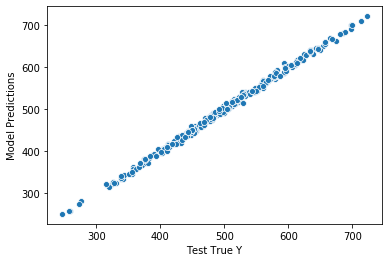

In [36]:
sns.scatterplot(x="Test True Y", y="Model Predictions", data=pred_df)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_absolute_error(pred_df["Test True Y"], pred_df["Model Predictions"])

4.019467737916637

In [39]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [40]:
mean_squared_error(pred_df["Test True Y"], pred_df["Model Predictions"])

25.212822017549225

In [41]:
mean_squared_error(pred_df["Test True Y"], pred_df["Model Predictions"])**0.5

5.021237100311956

### Predicting on brand new data

In [42]:
new_gem = [[998, 1000]]

In [43]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [44]:
model.predict(new_gem)

array([[734653.44]], dtype=float32)

### Saving and Loading a Model

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model.save("my_gem_model.h5")

In [47]:
later_model = load_model("my_gem_model.h5")

In [48]:
later_model.predict(new_gem)

array([[734653.44]], dtype=float32)